In [1]:
from icecube import dataclasses, dataio, icetray
from icecube.icetray import I3Units
import matplotlib.pyplot as plt
import numpy as np
import argparse, matplotlib

def astroFlux(Energy):
    '''
    Values taken from: A measurement of the diffuse astrophysical 
    muon neutrino flux using eight years of IceCube data.
    
    Link: https://inspirehep.net/files/99e2e4c9620a0bb4ddd15ff7749090b4
    '''
    
    return (1.01*1e-18)*(Energy/(100*1000))**(-2.19)

def simpleWeight(oneWeight, flux):
    return oneWeight*flux

In [16]:
# open file
infileList = []
f = 0
for i in range(0, 2000):
    infile = dataio.I3File('/data/p-one/akatil/step_1_medium_water/step_1_'+str(i)+'_PONE_Phase1_NuTau_NuE.i3.gz')
    infileList.append(infile)

sim_weight = ([])
flux = ([])
energy = ([])
nu = ([])
length = ([])
tau_energy = ([])

for infile in infileList:
    print(f)
    f = f+1
    while( infile.more() ):
        frame = infile.pop_daq()
        primary = frame["NuGPrimary"]
        mctree = frame["I3MCTree"]
        weightDict = frame["I3MCWeightDict"]
        weight = weightDict['OneWeight']
        #print(weight)
        mcTreeprimary = mctree.primaries
        first_child = dataclasses.I3MCTree.first_child(mctree, mcTreeprimary[0].id)
        
        if primary.type == 16 or primary.type == -16:
            #print(primary.type)
        
            first_child_position = first_child.pos
            first_childX = first_child_position.x
            first_childY = first_child_position.y
            first_childZ = first_child_position.z
            #print(first_child.length)
            #dist_to_center = np.sqrt((first_childX)**2 + (first_childY)**2 + (first_childZ)**2)
            
            if abs(first_childX) <= 3e2 and abs(first_childY) <= 3e2 and first_child.length == first_child.length:
                nu = np.append(nu, primary.type)
                energy = np.append(energy, primary.energy)
                f = astroFlux(primary.energy)
                flux = np.append(flux, f)
                sim_weight = np.append(sim_weight, simpleWeight(weight, f))
                length = np.append(length, first_child.length)
                tau_energy = np.append(tau_energy, first_child.energy)
                #print(first_child.type, first_child.length)
                
                     
            #zenith.append(np.cos(primary.dir.zenith))
            #azimuth.append(primary.dir.azimuth)
            #energy.append(primary.energy)

0
9.0541881827e-19
6.27233915787e-19
1.15937761823e-20
1.15480700544e-19
2.62415436403e-19
6.010875218e-19
1.75862541087e-19
3.88091674548e-19
1.0
4.47510170291e-19
5.21460341582e-19
9.22635736639e-19
5.70987134021e-19
5.11884325119e-19
7.65469802858e-19
7.19577027841e-19
3.06946058461e-19
2.06235391371e-20
3.07643700789e-19
1.88614426832e-19
9.04953303546e-19
9.64109927781e-19
1.59203616145e-19
5.5889956103e-19
1.0
5.89408590033e-19
6.25853278394e-19
1.76816537457e-19
3.57011327402e-19
4.80395304201e-19
2.18803920017e-20
2.7881688723e-20
9.6012609267e-19
6.67152080816e-20
2.80069797696e-19
1.47399623962e-19
8.13907836913e-19
6.05962985023e-19
5.05004362552e-20
1.0
2.6192395675e-19
8.57662971949e-20
1.0
4.13246175495e-20
6.28217412561e-20
4.62625072595e-19
8.4659117394e-19
1.69578640209e-19
1.0
4.83272225458e-19
3.39846634163e-19
6.97551591724e-19
1.0
2.35338324009e-19
1.68517200123e-19
7.34894371817e-19
1.04542369931e-20
1.07871328841e-19
1.03809744037e-19
2.14811192357e-19
2.16055491

8.57266212414e-19
1.22800152243e-20
5.06869774881e-19
2.26659320567e-19
1.00996214772e-18
1.0
8.80858372056e-19
1.0
5.00808460334e-19
2.74313496653e-19
2.92209180021e-20
2.43494756848e-20
8.03587808657e-20
8.56995576761e-19
2.62419133692e-19
4.76183222424e-19
4.57021276533e-19
8.53957691779e-19
1.10774215701e-19
8.0086233338e-19
1.0
6.21133256445e-19
7.50238874583e-19
6.033179252e-19
3.17175684766e-19
9.83537437455e-19
1.47608805429e-19
5.25709795224e-19
1.8806935133e-19
9.58421091957e-19
3.44415991515e-19
9.53662857346e-22
4.70367187496e-19
6.10965478584e-19
5.15663356837e-19
4.41740652566e-19
3.22684661483e-19
1.85687315216e-19
6.40204321626e-19
2.16510040166e-19
2.5089410998e-19
1.22839952019e-19
1.12219300284e-19
4.11312226243e-19
6.36457895888e-20
8.31762166707e-20
7.10711261955e-19
8.787485539e-19
7.37358934015e-21
2.06823143928e-19
7.07320327004e-19
6.50140363543e-19
1.22535679249e-20
9.37426579781e-20
3.39372333087e-22
3.24960781137e-19
7.56310236728e-19
2.45973391497e-19
4.027

1.05624502547e-19
2.74542963731e-20
1.0755095187e-19
6.88272003786e-19
3.89076190075e-19
8.58285983086e-20
8.27792748002e-19
5.75626519172e-20
8.84734826649e-20
1.83552921384e-19
3.43789682906e-19
3.48335688896e-19
4.6039749024e-19
8.50382659004e-19
8.15768020017e-19
3.23587875634e-19
1.4528164191e-19
2.61356606653e-19
8.89880038673e-20
4.09213570007e-19
3.60789089411e-19
5.48198033719e-20
3.46084649862e-19
1.0
2.75322216124e-20
2.42744323989e-19
6.69309883539e-19
4.85133403117e-19
2.91976501121e-20
1.0
3.59316236288e-19
8.54093117502e-19
2.01399726965e-19
3.74589180631e-19
7.84218725203e-19
1.0
7.67033925086e-19
3.19376013276e-20
4.42013287576e-20
1.35490124962e-19
1.91672402961e-19
6.00346090676e-19
5.98718193795e-19
4.80932397586e-19
1.0
4.37542305862e-19
9.3222508089e-19
3.74024838982e-19
7.85581471167e-21
1.0
1.82759058143e-19
8.74563056163e-20
4.19811230317e-21
1.16221878914e-20
2.32230163305e-19
1.82213011459e-19
1.43580117992e-20
6.72418872574e-19
3.04599273583e-19
2.4623969698

1.27583764934e-19
3.72015048158e-19
1.0
4.91965452345e-20
6.19920044156e-19
4.28913141813e-20
6.82645313632e-20
4.32625776186e-19
1.52641406261e-19
9.58792063344e-22
2.84731172724e-19
9.81698264932e-20
1.0
9.04250855166e-22
4.42554798817e-19
2.95500824522e-19
7.21741965444e-19
5.45170545465e-19
1.11261157544e-19
2.99743740383e-20
4.55702973308e-21
4.6538039985e-19
9.34856370846e-19
2.03397056838e-19
5.86041047797e-19
7.00528703698e-21
6.58715891094e-19
1.66628496328e-19
6.05360517378e-19
6.17929578229e-19
7.98622781197e-20
1.83724215828e-20
8.0707681465e-21
2.65203039199e-19
5.02091139146e-20
6.52961328875e-19
7.83039103663e-19
4.4752895237e-19
8.7765881683e-19
8.85301800176e-19
1.0
8.16614535871e-19
1.62299962779e-20
8.1685296467e-19
8.87979198807e-19
2.52010763139e-19
7.50933201751e-19
6.60441275791e-20
7.91299495861e-19
3.10266853621e-19
9.89729497184e-19
3.75225976502e-19
1.1999699441e-19
3.51051349595e-19
8.75057599096e-19
3.69880665377e-19
9.81635149202e-19
4.22750087536e-20
4.91

In [17]:
print(len(sim_weight), len(energy))

(5067, 5067)


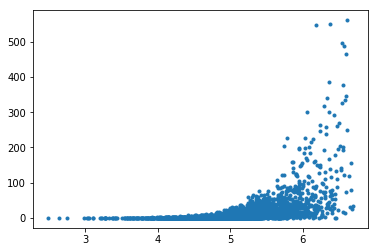

In [18]:
logE = np.log10(tau_energy)
plt.plot(logE, length, '.')

5067


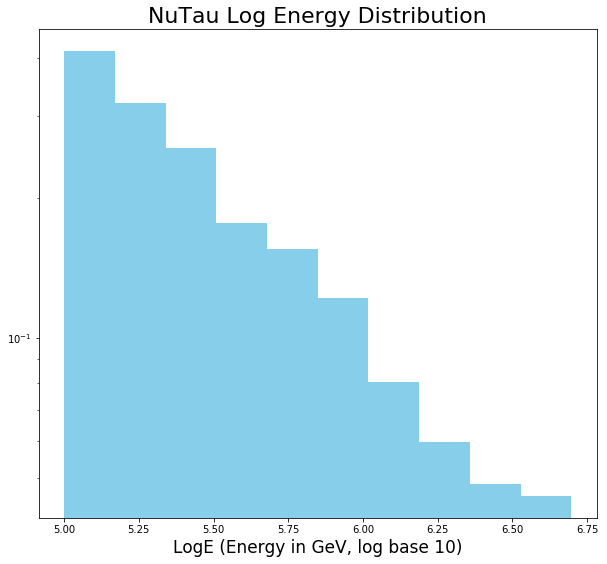

In [24]:
liveTime = 365.25*24*60*60
NEvents = len(infileList)*weightDict['NEvents']
event_weight = sim_weight*liveTime/(NEvents/2)
logE = np.log10(energy)
print(len(logE))
plt.figure(figsize=(10,9))
num, bins,_ = plt.hist(logE, log = True, weights=event_weight, color='skyblue')
#num1,bins1,_ = plt.hist(logE, histtype='step',log = True)
plt.title("NuTau Log Energy Distribution", fontsize=22)
plt.xlabel("LogE (Energy in GeV, log base 10)", fontsize=17)

In [25]:
NEvents

40000.0

In [26]:
sum(num)

1.6812396916341261

97962


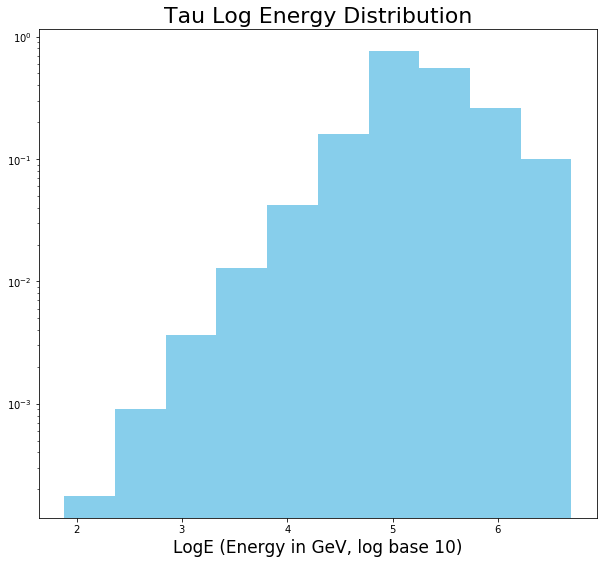

In [14]:
liveTime = 365*24*60*60
event_weight = sim_weight*liveTime/(len(infileList)*weightDict['NEvents'])
logE = np.log10(tau_energy)
print(len(logE))
plt.figure(figsize=(10,9))
num, bins,_ = plt.hist(logE, log = True, weights=event_weight, color='skyblue')
#num1,bins1,_ = plt.hist(logE, histtype='step',log = True)
plt.title("Tau Log Energy Distribution", fontsize=22)
plt.xlabel("LogE (Energy in GeV, log base 10)", fontsize=17)

9443


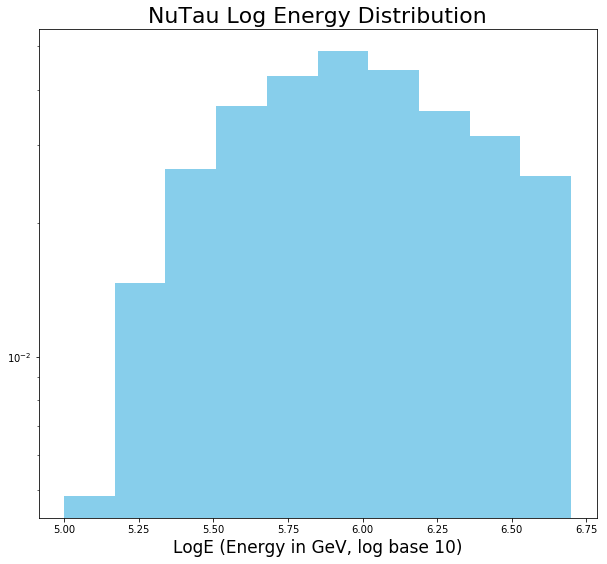

In [13]:
liveTime = 365*24*60*60
event_weight = sim_weight*liveTime/(len(infileList)*weightDict['NEvents'])
logE = np.log10(energy)
print(len(logE))
plt.figure(figsize=(10,9))
num, bins,_ = plt.hist(logE, log = True, weights=event_weight, color='skyblue')
#num1,bins1,_ = plt.hist(logE, histtype='step',log = True)
plt.title("NuTau Log Energy Distribution", fontsize=22)
plt.xlabel("LogE (Energy in GeV, log base 10)", fontsize=17)

In [10]:
weightDict['NEvents']

100.0

In [11]:
sum(num)

0.31152786675232846

In [34]:
1/0.297857465856925

3.35731050797413

1000.0

(array([2002., 1028.,  795.,  666.,  551.,  535.,  510.,  494.,  442.,
         399.]),
 array([1.91735590e-22, 1.01137939e-19, 2.02084143e-19, 3.03030347e-19,
        4.03976551e-19, 5.04922755e-19, 6.05868959e-19, 7.06815163e-19,
        8.07761367e-19, 9.08707571e-19, 1.00965377e-18]),
 <a list of 10 Patch objects>)

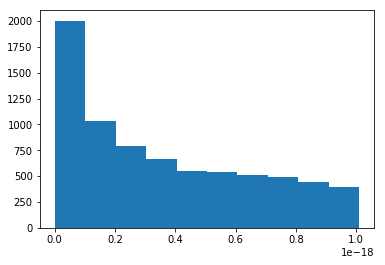

In [24]:
plt.hist(flux)

(array([762., 684., 707., 798., 755., 743., 726., 734., 782., 731.]),
 array([9.59559648e-16, 1.09617222e-14, 2.09638848e-14, 3.09660474e-14,
        4.09682099e-14, 5.09703725e-14, 6.09725351e-14, 7.09746976e-14,
        8.09768602e-14, 9.09790228e-14, 1.00981185e-13]),
 <a list of 10 Patch objects>)

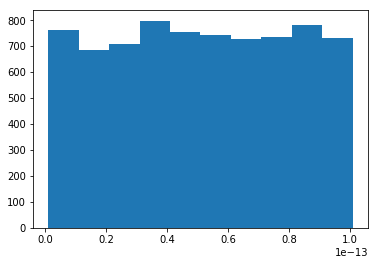

In [25]:
plt.hist(event_weight)

In [14]:
from icecube import dataclasses, dataio, icetray
from icecube.icetray import I3Units
from icecube.icetray import OMKey
import matplotlib.pyplot as plt
import scipy.constants as spc
import numpy as np

gcd_file = dataio.I3File('/home/users/akatil/P-ONE/GCD_files/PONE_Phase1.i3.gz')
cframe = gcd_file.pop_frame()
geometry = cframe["I3Geometry"]
omgeo = geometry.omgeo

sim_weight = ([])
flux = ([])
energy = ([])
nu = ([])
length = ([])
tau_energy = ([])

for file_num in range(0, 2000):
    file = dataio.I3File('/data/p-one/akatil/step_1_medium_water/tauDecay_5.0_6.7_PONE_Phase1_'+str(file_num)+'.i3.gz')
    #file = dataio.I3File('/data/p-one/akatil/step_1_medium_water/step_1_'+str(file_num)+'_PONE_Phase1_NuTau_NuE.i3.gz')
    for frame in file:
        primary = frame["NuGPrimary"]
        mctree = frame["I3MCTree"]
        mcTreeprimary = mctree.primaries
        #primary = mctree.primaries
        lepton = dataclasses.I3MCTree.first_child(mctree, mcTreeprimary[0].id)

        if lepton.type == 15 or lepton.type == -15:
            weightDict = frame["I3MCWeightDict"]
            weight = weightDict['OneWeight']
            tau_daughters = dataclasses.I3MCTree.get_daughters(mctree, lepton.id)
            tau_pos = lepton.pos
            x_tau_pos = tau_pos.x
            y_tau_pos = tau_pos.y
            z_tau_pos = tau_pos.z

            for td in range(0, len(tau_daughters)):
                if tau_daughters[td].type == 16 or tau_daughters[td].type == -16:
                    #print(tau_daughters[td])
                    tau_daughters_pos = tau_daughters[td].pos
                    x_td_pos = tau_daughters_pos.x
                    y_td_pos = tau_daughters_pos.y
                    z_td_pos = tau_daughters_pos.z
                    
            timeDiff = ([])
            for i in omgeo.keys():
                oKey = omgeo.get(i)
                domPos = oKey.position
                x_dom = domPos.x
                y_dom = domPos.y
                z_dom = domPos.z

                firstVertex = np.sqrt((x_dom - x_tau_pos)**2 + (y_dom - y_tau_pos)**2 + (z_dom - z_tau_pos)**2)
                secondVertex = np.sqrt((x_dom - x_td_pos)**2 + (y_dom - y_td_pos)**2 + (z_dom - z_td_pos)**2)
                
                if firstVertex <= 200 and secondVertex <= 200:
                    refractiveIndex = 1.333
                    speed_of_light_water = (spc.c)/refractiveIndex #[Units: m/seconds]
                    speed_of_light_ns = speed_of_light_water
                    #print(firstVertex-secondVertex)
                    tDiff_ns = ((firstVertex - secondVertex)/speed_of_light_water) * 1e9 #[Units: nanoseconds]
                    
                    if tDiff_ns >= 20 and tDiff_ns <= 200:
                        timeDiff = np.append(timeDiff, tDiff_ns)
                        
            if len(timeDiff) > 1:
                print('No of DOMs -', len(timeDiff))
                nu = np.append(nu, primary.type)
                energy = np.append(energy, primary.energy)
                f = astroFlux(primary.energy)
                flux = np.append(flux, f)
                sim_weight = np.append(sim_weight, simpleWeight(weight, f))
                length = np.append(length, lepton.length)
                tau_energy = np.append(tau_energy, lepton.energy)
                
                #print(tDiff_ns)

    print('file_number -', file_num)

('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 8)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 9)
('No of DOMs -', 4)
('file_number -', 0)
('No of DOMs -', 2)
('No of DOMs -', 13)
('No of DOMs -', 2)
('No of DOMs -', 6)
('file_number -', 1)
('No of DOMs -', 2)
('No of DOMs -', 15)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 4)
('file_number -', 2)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 9)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 11)
('No of DOMs -', 6)
('file_number -', 3)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 6)
('file_number -', 4)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 14)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 10)
('No of DOMs -', 8)
('No of DO

('No of DOMs -', 7)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 11)
('No of DOMs -', 10)
('file_number -', 46)
('No of DOMs -', 2)
('No of DOMs -', 12)
('No of DOMs -', 3)
('No of DOMs -', 4)
('file_number -', 47)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 14)
('No of DOMs -', 3)
('No of DOMs -', 5)
('file_number -', 48)
('No of DOMs -', 2)
('No of DOMs -', 9)
('No of DOMs -', 9)
('No of DOMs -', 6)
('No of DOMs -', 16)
('No of DOMs -', 5)
('No of DOMs -', 8)
('No of DOMs -', 3)
('No of DOMs -', 2)
('file_number -', 49)
('No of DOMs -', 12)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 6)
('file_number -', 50)
('No of DOMs -', 5)
('No of DOMs -', 7)
('No of DOMs -', 3)
('file_number -', 51)
('No of DOMs -', 6)
('No of DOMs -', 8)
('No of DOMs -', 10)
('No of DOMs -', 8)
('No of DOMs -', 15)
('No of DOMs -', 8)
('file_number -', 52)
('No of DOMs -', 1

('No of DOMs -', 5)
('No of DOMs -', 3)
('file_number -', 95)
('No of DOMs -', 2)
('No of DOMs -', 12)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 10)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 2)
('file_number -', 96)
('No of DOMs -', 6)
('No of DOMs -', 8)
('No of DOMs -', 11)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 7)
('No of DOMs -', 3)
('No of DOMs -', 3)
('file_number -', 97)
('No of DOMs -', 10)
('No of DOMs -', 5)
('No of DOMs -', 10)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 6)
('file_number -', 98)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 11)
('No of DOMs -', 8)
('No of DOMs -', 5)
('No of DOMs -', 9)
('No of DOMs -', 8)
('No of DOMs -', 6)
('file_number -', 99)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No

('No of DOMs -', 2)
('file_number -', 142)
('No of DOMs -', 3)
('No of DOMs -', 10)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 16)
('No of DOMs -', 15)
('file_number -', 143)
('No of DOMs -', 12)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 13)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 4)
('file_number -', 144)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 8)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 3)
('file_number -', 145)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 12)
('No of DOMs -', 13)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 7)
('No of DOMs -', 2)
('file_number -', 146)
('No of DOMs -', 7)
('No of DOMs -', 2)
('No of DOMs -', 13)
('No of DOMs -', 12)
('file_number -', 147)
('No of DOMs -', 15)
('No of DOMs

('No of DOMs -', 7)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 10)
('No of DOMs -', 4)
('No of DOMs -', 3)
('file_number -', 190)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 8)
('No of DOMs -', 11)
('No of DOMs -', 8)
('No of DOMs -', 9)
('No of DOMs -', 3)
('No of DOMs -', 5)
('file_number -', 191)
('No of DOMs -', 7)
('No of DOMs -', 7)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 8)
('No of DOMs -', 4)
('No of DOMs -', 6)
('file_number -', 192)
('No of DOMs -', 11)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 9)
('No of DOMs -', 4)
('No of DOMs -', 13)
('No of DOMs -', 3)
('file_number -', 193)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 11)
('No of DOMs -', 4)
('No of DOMs -', 13)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 5)
('file_number -', 194)
('No of DOMs -', 7)
('No of DOMs -', 12)
('No of DOMs -', 4)
('No of DOMs -', 1

('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 7)
('No of DOMs -', 3)
('No of DOMs -', 9)
('file_number -', 235)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 8)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 3)
('file_number -', 236)
('No of DOMs -', 10)
('No of DOMs -', 12)
('No of DOMs -', 13)
('No of DOMs -', 8)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 3)
('file_number -', 237)
('No of DOMs -', 7)
('No of DOMs -', 8)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 11)
('No of DOMs -', 3)
('file_number -', 238)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 7)
('file_number -', 239)
('No of DOMs -', 8)
('No of DOMs -', 13)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 10)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 16)
('No of DOMs -', 2

('No of DOMs -', 8)
('No of DOMs -', 10)
('No of DOMs -', 7)
('No of DOMs -', 4)
('file_number -', 279)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 2)
('file_number -', 280)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 19)
('No of DOMs -', 12)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 5)
('file_number -', 281)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 5)
('file_number -', 282)
('No of DOMs -', 17)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 11)
('No of DOMs -', 9)
('No of DOMs -', 9)
('No of DOMs -', 11)
('file_number -', 283)
('No of DOMs -', 4)
('No of DOMs -', 10)
('No of DOMs -', 2)
('No of DOMs -', 5)
('file_number -', 284)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 8)
('No of DOMs -'

('No of DOMs -', 2)
('No of DOMs -', 11)
('No of DOMs -', 6)
('file_number -', 327)
('No of DOMs -', 14)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 10)
('No of DOMs -', 7)
('No of DOMs -', 3)
('No of DOMs -', 11)
('No of DOMs -', 6)
('file_number -', 328)
('No of DOMs -', 9)
('No of DOMs -', 9)
('No of DOMs -', 14)
('No of DOMs -', 15)
('No of DOMs -', 4)
('No of DOMs -', 10)
('No of DOMs -', 5)
('file_number -', 329)
('No of DOMs -', 11)
('No of DOMs -', 2)
('No of DOMs -', 7)
('No of DOMs -', 5)
('No of DOMs -', 5)
('No of DOMs -', 11)
('No of DOMs -', 7)
('No of DOMs -', 12)
('No of DOMs -', 15)
('file_number -', 330)
('No of DOMs -', 2)
('No of DOMs -', 9)
('No of DOMs -', 2)
('No of DOMs -', 10)
('No of DOMs -', 6)
('file_number -', 331)
('No of DOMs -', 8)
('No of DOMs -', 14)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 5)
('file_number -', 332)
('No of DOMs -', 10)
('No of DOMs -', 5)
('No of 

('No of DOMs -', 3)
('No of DOMs -', 8)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 5)
('file_number -', 374)
('No of DOMs -', 4)
('No of DOMs -', 8)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 6)
('file_number -', 375)
('No of DOMs -', 15)
('No of DOMs -', 2)
('No of DOMs -', 10)
('No of DOMs -', 2)
('No of DOMs -', 7)
('file_number -', 376)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 8)
('No of DOMs -', 4)
('No of DOMs -', 8)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 13)
('file_number -', 377)
('No of DOMs -', 5)
('No of DOMs -', 7)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 14)
('No of DOMs -', 16)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 4)
('file_number -', 378)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 5)


('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 12)
('No of DOMs -', 2)
('No of DOMs -', 5)
('file_number -', 419)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 11)
('No of DOMs -', 2)
('No of DOMs -', 6)
('file_number -', 420)
('No of DOMs -', 14)
('No of DOMs -', 11)
('No of DOMs -', 11)
('No of DOMs -', 11)
('No of DOMs -', 18)
('No of DOMs -', 4)
('No of DOMs -', 11)
('No of DOMs -', 2)
('file_number -', 421)
('No of DOMs -', 5)
('No of DOMs -', 10)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 16)
('No of DOMs -', 3)
('No of DOMs -', 10)
('No of DOMs -', 12)
('file_number -', 422)
('No of DOMs -', 4)
('No of DOMs -', 7)
('No of DOMs -', 11)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 8)
('No of DOMs -', 3)
('No of DOMs -', 6)
('file_number -', 423)
('No of DOMs

('No of DOMs -', 10)
('file_number -', 466)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 9)
('No of DOMs -', 9)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 4)
('file_number -', 467)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 12)
('No of DOMs -', 7)
('No of DOMs -', 5)
('file_number -', 468)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 9)
('No of DOMs -', 10)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 7)
('file_number -', 469)
('No of DOMs -', 9)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 12)
('No of DOMs -', 3)
('No of DOMs -', 10)
('No of DOMs -', 6)
('No of DOMs -', 3)
('file_number -', 470)
('No of DOMs -', 14)
('No of DOMs -', 5)
('No of DOMs -', 13)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 3

('No of DOMs -', 4)
('No of DOMs -', 5)
('file_number -', 510)
('No of DOMs -', 5)
('No of DOMs -', 5)
('No of DOMs -', 5)
('file_number -', 511)
('No of DOMs -', 2)
('No of DOMs -', 8)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 8)
('No of DOMs -', 9)
('No of DOMs -', 13)
('No of DOMs -', 5)
('file_number -', 512)
('No of DOMs -', 4)
('No of DOMs -', 13)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 11)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 14)
('file_number -', 513)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 5)
('file_number -', 514)
('No of DOMs -', 4)
('No of DOMs -', 11)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 11)
('No of DOMs -', 3)
('file_number -', 515)
('No of DOMs -', 4)
('No of DOMs -', 11)
('No of DOMs -', 8)
('No of DOMs -', 7)
('file_number -', 516)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 10)
('No of DOM

('No of DOMs -', 9)
('No of DOMs -', 5)
('file_number -', 556)
('No of DOMs -', 7)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 5)
('file_number -', 557)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 11)
('file_number -', 558)
('No of DOMs -', 12)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 6)
('file_number -', 559)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 16)
('No of DOMs -', 12)
('No of DOMs -', 3)
('No of DOMs -', 4)
('file_number -', 560)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 17)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 9)
('file_number -', 561)
('No of DOMs -', 9)
('No of DOMs -', 

('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 10)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 7)
('No of DOMs -', 2)
('No of DOMs -', 2)
('file_number -', 601)
('No of DOMs -', 7)
('No of DOMs -', 6)
('No of DOMs -', 12)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 13)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 6)
('file_number -', 602)
('No of DOMs -', 11)
('No of DOMs -', 10)
('No of DOMs -', 8)
('No of DOMs -', 3)
('No of DOMs -', 9)
('No of DOMs -', 2)
('No of DOMs -', 3)
('file_number -', 603)
('No of DOMs -', 6)
('No of DOMs -', 16)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 11)
('No of DOMs -', 4)
('No of DOMs -', 7)
('No of DOMs -', 8)
('file_number -', 604)
('No of DOMs -', 4)
('No of DOMs -', 9)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 13)
('No of DOMs -', 2)
('No of DOMs -', 16)
('No of DOMs -', 12)
('file_number -', 605)
('No of DOMs -'

('No of DOMs -', 10)
('file_number -', 646)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 4)
('file_number -', 647)
('No of DOMs -', 17)
('No of DOMs -', 14)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 5)
('No of DOMs -', 2)
('file_number -', 648)
('No of DOMs -', 8)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 7)
('No of DOMs -', 3)
('No of DOMs -', 10)
('No of DOMs -', 6)
('file_number -', 649)
('No of DOMs -', 9)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 12)
('No of DOMs -', 3)
('No of DOMs -', 8)
('No of DOMs -', 6)
('No of DOMs -', 7)
('file_number -', 650)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 9)
('No of DOMs -', 5)
('file_number -', 651)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 

('No of DOMs -', 7)
('No of DOMs -', 12)
('No of DOMs -', 14)
('No of DOMs -', 5)
('file_number -', 692)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 8)
('No of DOMs -', 8)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 13)
('file_number -', 693)
('No of DOMs -', 3)
('No of DOMs -', 12)
('No of DOMs -', 9)
('No of DOMs -', 9)
('No of DOMs -', 5)
('No of DOMs -', 7)
('file_number -', 694)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 14)
('No of DOMs -', 12)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 8)
('No of DOMs -', 7)
('file_number -', 695)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 12)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 3)
('file_number -', 696)
('No of DOMs -', 4)
('No of DOMs -', 8)
('No of DOMs -', 7)
('No of DOMs -', 2)
('No of DOMs -', 1

('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 7)
('file_number -', 735)
('No of DOMs -', 2)
('No of DOMs -', 12)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 7)
('No of DOMs -', 2)
('file_number -', 736)
('No of DOMs -', 13)
('No of DOMs -', 12)
('No of DOMs -', 2)
('No of DOMs -', 8)
('No of DOMs -', 13)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 6)
('file_number -', 737)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 8)
('No of DOMs -', 8)
('No of DOMs -', 8)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 8)
('No of DOMs -', 14)
('No of DOMs -', 9)
('file_number -', 738)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 5)
('file_number -', 739)
('No of DOMs -', 6)
('No of DOMs -', 8)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 8)
('No of DOMs -', 3)


('No of DOMs -', 8)
('No of DOMs -', 7)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 4)
('file_number -', 779)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 11)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 11)
('file_number -', 780)
('No of DOMs -', 8)
('No of DOMs -', 9)
('No of DOMs -', 7)
('No of DOMs -', 7)
('No of DOMs -', 8)
('No of DOMs -', 15)
('No of DOMs -', 2)
('file_number -', 781)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 14)
('No of DOMs -', 7)
('file_number -', 782)
('No of DOMs -', 10)
('No of DOMs -', 4)
('No of DOMs -', 7)
('No of DOMs -', 5)
('No of DOMs -', 5)
('file_number -', 783)
('No of DOMs -', 8)
('No of DOMs -', 12)
('No of DOMs -', 13)
('No of DOMs -', 7)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 4)
('file_number -', 784)
('No of DOMs -', 12)
('No of DOMs -', 10)
('No of DOMs -', 5)
('No of DOMs 

('No of DOMs -', 7)
('No of DOMs -', 11)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 5)
('file_number -', 826)
('No of DOMs -', 13)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 10)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 7)
('No of DOMs -', 2)
('file_number -', 827)
('No of DOMs -', 12)
('No of DOMs -', 12)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 7)
('file_number -', 828)
('No of DOMs -', 12)
('No of DOMs -', 14)
('No of DOMs -', 11)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 11)
('No of DOMs -', 10)
('No of DOMs -', 8)
('No of DOMs -', 13)
('No of DOMs -', 9)
('No of DOMs -', 4)
('file_number -', 829)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 15)
('No of DOMs -', 10)
('No of DOMs -', 2)
('No of DOMs -', 17)
('file_number 

('No of DOMs -', 2)
('No of DOMs -', 4)
('file_number -', 873)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 7)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 10)
('No of DOMs -', 8)
('file_number -', 874)
('No of DOMs -', 2)
('No of DOMs -', 7)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 10)
('No of DOMs -', 3)
('No of DOMs -', 9)
('No of DOMs -', 10)
('No of DOMs -', 9)
('No of DOMs -', 4)
('No of DOMs -', 8)
('No of DOMs -', 8)
('No of DOMs -', 5)
('file_number -', 875)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 16)
('No of DOMs -', 10)
('No of DOMs -', 8)
('No of DOMs -', 11)
('No of DOMs -', 4)
('file_number -', 876)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 9)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 4)
('file_number -', 877)
('No of DOMs -', 4)
('No of DOMs -', 12)
('No of DOMs -', 3

('No of DOMs -', 2)
('No of DOMs -', 5)
('file_number -', 919)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 8)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 12)
('No of DOMs -', 6)
('file_number -', 920)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 11)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 15)
('No of DOMs -', 9)
('No of DOMs -', 7)
('No of DOMs -', 5)
('file_number -', 921)
('No of DOMs -', 7)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 7)
('No of DOMs -', 5)
('No of DOMs -', 5)
('file_number -', 922)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 4)
('file_number -', 923)
('No of DOMs -', 2)
('No of DOMs -', 8)
('No of DOMs -', 6)
('No of DOMs -', 9)
('No of DOMs -', 13)
('No of DOMs -', 2)
('file_number -', 924

('No of DOMs -', 3)
('No of DOMs -', 10)
('No of DOMs -', 11)
('No of DOMs -', 6)
('No of DOMs -', 12)
('No of DOMs -', 2)
('No of DOMs -', 15)
('file_number -', 964)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 14)
('No of DOMs -', 12)
('No of DOMs -', 10)
('file_number -', 965)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 10)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 5)
('file_number -', 966)
('No of DOMs -', 16)
('No of DOMs -', 10)
('No of DOMs -', 8)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 16)
('No of DOMs -', 2)
('file_number -', 967)
('No of DOMs -', 3)
('No of DOMs -', 12)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 6)
('file_number -', 968)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 6)
('file_number -', 969)
('No of DOMs -', 7)
('No of DOMs -', 23)
('No of DOMs -', 6)
('No of D

('No of DOMs -', 2)
('No of DOMs -', 7)
('No of DOMs -', 13)
('No of DOMs -', 8)
('No of DOMs -', 8)
('No of DOMs -', 5)
('file_number -', 1010)
('No of DOMs -', 11)
('No of DOMs -', 9)
('No of DOMs -', 11)
('file_number -', 1011)
('No of DOMs -', 2)
('No of DOMs -', 7)
('No of DOMs -', 6)
('No of DOMs -', 9)
('No of DOMs -', 8)
('No of DOMs -', 15)
('No of DOMs -', 2)
('No of DOMs -', 3)
('file_number -', 1012)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 7)
('No of DOMs -', 2)
('No of DOMs -', 3)
('file_number -', 1013)
('No of DOMs -', 12)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 9)
('No of DOMs -', 15)
('No of DOMs -', 2)
('file_number -', 1014)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 18)
('No of DOMs -', 5)
('file_number -', 1015)
('No of DOMs -', 4)
('No of DOMs -', 16)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 7)
('No of 

('file_number -', 1057)
('No of DOMs -', 8)
('No of DOMs -', 15)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 8)
('No of DOMs -', 9)
('No of DOMs -', 6)
('No of DOMs -', 10)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 5)
('file_number -', 1058)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 15)
('No of DOMs -', 13)
('No of DOMs -', 6)
('No of DOMs -', 4)
('file_number -', 1059)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 12)
('No of DOMs -', 15)
('No of DOMs -', 12)
('file_number -', 1060)
('No of DOMs -', 6)
('No of DOMs -', 17)
('No of DOMs -', 7)
('No of DOMs -', 3)
('No of DOMs -', 7)
('file_number -', 1061)
('No of DOMs -', 10)
('No of DOMs -', 15)
('No of DOMs -', 12)
('No of DOMs -', 9)
('No of DOMs -', 5)
('No of DOMs -', 15)
('No of DOMs -', 3)
('No of DOMs -', 7)
('file_number -', 1062)
('No of DOMs -', 11)
('N

('No of DOMs -', 12)
('No of DOMs -', 11)
('No of DOMs -', 4)
('file_number -', 1101)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 11)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 4)
('file_number -', 1102)
('No of DOMs -', 7)
('No of DOMs -', 15)
('No of DOMs -', 8)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 9)
('No of DOMs -', 6)
('No of DOMs -', 14)
('file_number -', 1103)
('No of DOMs -', 6)
('No of DOMs -', 14)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 10)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 8)
('No of DOMs -', 5)
('No of DOMs -', 19)
('No of DOMs -', 5)
('file_number -', 1104)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 10)
('No of DOMs -', 5)
('No of DOMs -', 11)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 4)
('file_number -', 1105)
('No of DOMs -', 3)
('No of DOMs -', 9)
('No of DOMs -', 3)
('No of DOMs -', 9)
('No of DOMs -', 3)
('No of DO

('No of DOMs -', 2)
('No of DOMs -', 12)
('No of DOMs -', 7)
('No of DOMs -', 6)
('No of DOMs -', 5)
('file_number -', 1146)
('No of DOMs -', 12)
('No of DOMs -', 8)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 12)
('No of DOMs -', 2)
('No of DOMs -', 2)
('file_number -', 1147)
('No of DOMs -', 13)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 12)
('No of DOMs -', 6)
('file_number -', 1148)
('No of DOMs -', 8)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 12)
('No of DOMs -', 4)
('file_number -', 1149)
('No of DOMs -', 5)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 2)
('file_number -', 1150)
('No of DOMs -', 9)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 8)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 12)
('No of DOMs -', 8)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 5)
('file_number -', 1151)
('No of D

('No of DOMs -', 4)
('file_number -', 1193)
('No of DOMs -', 14)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 8)
('No of DOMs -', 8)
('No of DOMs -', 5)
('No of DOMs -', 13)
('No of DOMs -', 9)
('file_number -', 1194)
('No of DOMs -', 2)
('No of DOMs -', 10)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 12)
('No of DOMs -', 5)
('file_number -', 1195)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 8)
('file_number -', 1196)
('No of DOMs -', 2)
('No of DOMs -', 13)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 2)
('file_number -', 1197)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 14)
('No of DOMs -', 4)
('No of DOMs -', 7)
('No of DOMs -', 6)
('No of DOMs -', 8)
('No of DOMs -', 3)
('No of DOMs -', 13)
('file_number -', 1198)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of D

('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 4)
('file_number -', 1239)
('No of DOMs -', 3)
('No of DOMs -', 9)
('No of DOMs -', 8)
('No of DOMs -', 8)
('No of DOMs -', 6)
('No of DOMs -', 18)
('No of DOMs -', 2)
('No of DOMs -', 10)
('No of DOMs -', 7)
('file_number -', 1240)
('No of DOMs -', 5)
('No of DOMs -', 10)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 10)
('No of DOMs -', 2)
('file_number -', 1241)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 9)
('No of DOMs -', 13)
('No of DOMs -', 6)
('file_number -', 1242)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 9)
('No of DOMs -', 3)
('No of DOMs -', 8)
('No of DOMs -', 9)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 10)
('No of DOMs -', 5)
('No of DOMs -', 2)
('file_number -', 1243)
('No of DOMs -', 7)
('No of DOMs -', 6)
('No of DOMs -', 12)
('file_number -', 1244)
('No of DOMs -', 9)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 4)
('file_nu

('No of DOMs -', 13)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 14)
('No of DOMs -', 4)
('No of DOMs -', 4)
('file_number -', 1289)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 10)
('No of DOMs -', 7)
('No of DOMs -', 3)
('No of DOMs -', 7)
('file_number -', 1290)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 13)
('No of DOMs -', 3)
('file_number -', 1291)
('No of DOMs -', 12)
('No of DOMs -', 2)
('No of DOMs -', 7)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 8)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 7)
('file_number -', 1292)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 13)
('No of DOMs -', 8)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 12)
('file_number -', 1293)
('No of DOMs -', 3)
('No of DOMs -', 11)
('No of DOMs -', 17)
('No of DOMs -', 4)
('No of DOMs -', 8)
('No of DOM

('No of DOMs -', 7)
('No of DOMs -', 6)
('No of DOMs -', 12)
('No of DOMs -', 3)
('No of DOMs -', 8)
('No of DOMs -', 11)
('No of DOMs -', 5)
('No of DOMs -', 9)
('file_number -', 1335)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 2)
('No of DOMs -', 11)
('No of DOMs -', 12)
('No of DOMs -', 8)
('No of DOMs -', 4)
('file_number -', 1336)
('No of DOMs -', 9)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 11)
('file_number -', 1337)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 13)
('No of DOMs -', 10)
('file_number -', 1338)
('No of DOMs -', 9)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 7)
('No of DOMs -', 5)
('No of DOMs -', 12)
('No of DOMs -', 7)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 2)
('file_number -', 1339)
('No of DOMs -', 15)
('No of DOMs -', 10)
('No of DOMs -', 4)
('No of DOMs -', 3)
('file_number -', 1340)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 13)
('No of DOMs -', 7)
('No 

('No of DOMs -', 6)
('No of DOMs -', 9)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 2)
('file_number -', 1385)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 10)
('file_number -', 1386)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 9)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 14)
('No of DOMs -', 2)
('file_number -', 1387)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 11)
('No of DOMs -', 9)
('No of DOMs -', 11)
('file_number -', 1388)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 12)
('No of DOMs -', 11)
('No of DOMs -', 4)
('No of DOMs -', 13)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 6)
('file_number -', 1389)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 11)
('No of DOMs

('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 8)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 8)
('No of DOMs -', 5)
('file_number -', 1431)
('No of DOMs -', 16)
('No of DOMs -', 15)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 8)
('No of DOMs -', 14)
('file_number -', 1432)
('No of DOMs -', 13)
('No of DOMs -', 3)
('No of DOMs -', 3)
('file_number -', 1433)
('No of DOMs -', 7)
('No of DOMs -', 6)
('No of DOMs -', 4)
('file_number -', 1434)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 8)
('file_number -', 1435)
('No of DOMs -', 4)
('No of DOMs -', 7)
('No of DOMs -', 16)
('No of DOMs -', 16)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 6)
('file_number -', 1436)
('No of DOMs -', 17)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of D

('No of DOMs -', 13)
('file_number -', 1474)
('No of DOMs -', 5)
('No of DOMs -', 15)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 15)
('No of DOMs -', 4)
('No of DOMs -', 12)
('file_number -', 1475)
('No of DOMs -', 5)
('No of DOMs -', 16)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 14)
('No of DOMs -', 12)
('file_number -', 1476)
('No of DOMs -', 14)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 5)
('file_number -', 1477)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 13)
('No of DOMs -', 8)
('file_number -', 1478)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 15)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 6)
('file_number -', 1479)
('No of DOMs -', 13)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No 

('No of DOMs -', 2)
('file_number -', 1522)
('No of DOMs -', 3)
('No of DOMs -', 9)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 10)
('No of DOMs -', 8)
('No of DOMs -', 7)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 11)
('No of DOMs -', 4)
('file_number -', 1523)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 4)
('file_number -', 1524)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 15)
('No of DOMs -', 12)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 8)
('No of DOMs -', 6)
('file_number -', 1525)
('No of DOMs -', 9)
('No of DOMs -', 7)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 13)
('No of DOMs -', 18)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 11)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 

('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 15)
('No of DOMs -', 13)
('No of DOMs -', 2)
('No of DOMs -', 4)
('file_number -', 1567)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 8)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 14)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 8)
('No of DOMs -', 2)
('No of DOMs -', 2)
('file_number -', 1568)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 13)
('No of DOMs -', 6)
('No of DOMs -', 15)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 13)
('No of DOMs -', 6)
('file_number -', 1569)
('No of DOMs -', 6)
('No of DOMs -', 15)
('No of DOMs -', 6)
('No of DOMs -', 7)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 3)
('file_number -', 1570)
('No of DOMs -', 8)
('No of DOMs -', 10)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 10)
('No of DOMs -', 7)
('No of DOMs -', 2)
('No of DOMs -', 8)
('No of DOMs -'

('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 6)
('file_number -', 1613)
('No of DOMs -', 8)
('No of DOMs -', 11)
('No of DOMs -', 16)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 9)
('No of DOMs -', 20)
('No of DOMs -', 5)
('No of DOMs -', 12)
('file_number -', 1614)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 12)
('No of DOMs -', 4)
('No of DOMs -', 9)
('file_number -', 1615)
('No of DOMs -', 4)
('No of DOMs -', 10)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 4)
('file_number -', 1616)
('No of DOMs -', 13)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 7)
('No of DOMs -', 15)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 10)
('file_number -', 1617)
('No of DOMs -', 15)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 7)
('No of DOMs -', 2)
('file_num

('No of DOMs -', 5)
('No of DOMs -', 7)
('file_number -', 1660)
('No of DOMs -', 9)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 12)
('No of DOMs -', 3)
('file_number -', 1661)
('No of DOMs -', 3)
('No of DOMs -', 9)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 19)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 8)
('file_number -', 1662)
('No of DOMs -', 8)
('No of DOMs -', 13)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 11)
('No of DOMs -', 9)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 3)
('file_number -', 1663)
('No of DOMs -', 8)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 5)
('file_number -', 1664)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 10)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 11)
('file_number -', 1665)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DO

('No of DOMs -', 5)
('No of DOMs -', 9)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 2)
('file_number -', 1709)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 8)
('No of DOMs -', 5)
('No of DOMs -', 5)
('No of DOMs -', 13)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 6)
('file_number -', 1710)
('No of DOMs -', 5)
('No of DOMs -', 13)
('No of DOMs -', 6)
('No of DOMs -', 14)
('No of DOMs -', 4)
('No of DOMs -', 8)
('No of DOMs -', 2)
('No of DOMs -', 5)
('No of DOMs -', 10)
('No of DOMs -', 4)
('file_number -', 1711)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 10)
('No of DOMs -', 13)
('No of DOMs -', 8)
('No of DOMs -', 5)
('file_number -', 1712)
('No of DOMs -', 10)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 2)
('file_number -', 1713)
('No of DOMs -', 2)
('No of DOMs -', 15)
('No of DOMs

('No of DOMs -', 3)
('No of DOMs -', 9)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 6)
('file_number -', 1755)
('No of DOMs -', 2)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 8)
('No of DOMs -', 9)
('No of DOMs -', 5)
('file_number -', 1756)
('No of DOMs -', 7)
('No of DOMs -', 11)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 18)
('No of DOMs -', 10)
('No of DOMs -', 11)
('file_number -', 1757)
('No of DOMs -', 2)
('No of DOMs -', 12)
('No of DOMs -', 4)
('No of DOMs -', 7)
('file_number -', 1758)
('No of DOMs -', 4)
('No of DOMs -', 12)
('No of DOMs -', 12)
('No of DOMs -', 7)
('file_number -', 1759)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 12)
('No of DOMs -', 3)
('No of DOMs -', 8)
('No of DOMs -', 7)
('No of DOMs -', 4)
('No of DOMs -', 8)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 6)
('file_number -', 1760)
('No of DOMs -', 5)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of 

('file_number -', 1806)
('No of DOMs -', 3)
('No of DOMs -', 8)
('No of DOMs -', 12)
('No of DOMs -', 3)
('No of DOMs -', 5)
('No of DOMs -', 12)
('No of DOMs -', 6)
('file_number -', 1807)
('No of DOMs -', 5)
('No of DOMs -', 8)
('No of DOMs -', 11)
('No of DOMs -', 7)
('No of DOMs -', 4)
('file_number -', 1808)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 9)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 13)
('file_number -', 1809)
('No of DOMs -', 10)
('No of DOMs -', 10)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 8)
('file_number -', 1810)
('No of DOMs -', 6)
('No of DOMs -', 11)
('No of DOMs -', 15)
('No of DOMs -', 5)
('No of DOMs -', 5)
('file_number -', 1811)
('No of DOMs -', 7)
('No of DOMs -', 5)
('No of DOMs -', 2)
('No of DOMs -', 8)
('No of DOMs -', 2)
('No of DOMs -', 3)
('No of DOMs -', 8)
('No of DOMs -', 2)
('file_number -', 1812)
('No of DOMs -', 2)
('No

('No of DOMs -', 14)
('No of DOMs -', 10)
('No of DOMs -', 10)
('file_number -', 1855)
('No of DOMs -', 7)
('No of DOMs -', 10)
('No of DOMs -', 12)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 6)
('file_number -', 1856)
('No of DOMs -', 9)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 4)
('file_number -', 1857)
('No of DOMs -', 15)
('No of DOMs -', 4)
('No of DOMs -', 16)
('No of DOMs -', 5)
('No of DOMs -', 2)
('file_number -', 1858)
('No of DOMs -', 5)
('No of DOMs -', 5)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 9)
('No of DOMs -', 8)
('file_number -', 1859)
('No of DOMs -', 3)
('No of DOMs -', 7)
('No of DOMs -', 11)
('No of DOMs -', 4)
('No of DOMs -', 6)
('file_number -', 1860)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 8)
('No of DOMs -', 12)
('No of DOMs -', 4)
('No of DOMs -', 8)
('file_number -', 1861)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 7)
('N

('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 13)
('file_number -', 1901)
('No of DOMs -', 11)
('No of DOMs -', 2)
('No of DOMs -', 15)
('No of DOMs -', 4)
('No of DOMs -', 3)
('file_number -', 1902)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 13)
('No of DOMs -', 6)
('file_number -', 1903)
('No of DOMs -', 9)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 2)
('No of DOMs -', 10)
('No of DOMs -', 7)
('file_number -', 1904)
('No of DOMs -', 3)
('No of DOMs -', 3)
('No of DOMs -', 13)
('No of DOMs -', 7)
('No of DOMs -', 2)
('No of DOMs -', 7)
('file_number -', 1905)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 4)
('No of DOMs -', 3)
('file_number -', 1906)
('No of DOMs -', 6)
('No of DOMs -', 5)
('No of DOMs -', 5)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DO

('No of DOMs -', 11)
('No of DOMs -', 9)
('No of DOMs -', 3)
('No of DOMs -', 9)
('No of DOMs -', 2)
('No of DOMs -', 2)
('No of DOMs -', 7)
('file_number -', 1951)
('No of DOMs -', 3)
('No of DOMs -', 6)
('No of DOMs -', 3)
('No of DOMs -', 2)
('No of DOMs -', 4)
('No of DOMs -', 7)
('file_number -', 1952)
('No of DOMs -', 4)
('No of DOMs -', 5)
('No of DOMs -', 9)
('No of DOMs -', 12)
('No of DOMs -', 2)
('No of DOMs -', 8)
('file_number -', 1953)
('No of DOMs -', 6)
('No of DOMs -', 7)
('No of DOMs -', 8)
('No of DOMs -', 4)
('No of DOMs -', 6)
('No of DOMs -', 4)
('No of DOMs -', 4)
('No of DOMs -', 7)
('No of DOMs -', 3)
('file_number -', 1954)
('No of DOMs -', 12)
('No of DOMs -', 3)
('No of DOMs -', 10)
('No of DOMs -', 5)
('No of DOMs -', 4)
('No of DOMs -', 3)
('No of DOMs -', 11)
('file_number -', 1955)
('No of DOMs -', 7)
('No of DOMs -', 14)
('No of DOMs -', 4)
('No of DOMs -', 4)
('file_number -', 1956)
('No of DOMs -', 7)
('No of DOMs -', 8)
('No of DOMs -', 3)
('No of DO

15411


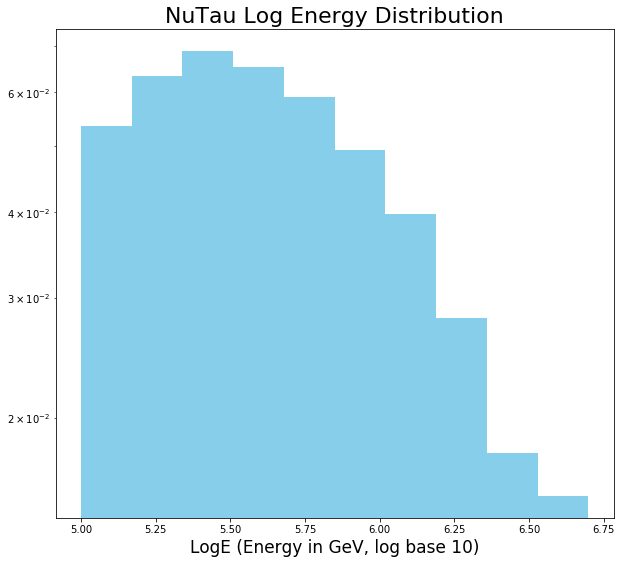

In [16]:
liveTime = 365*24*60*60
event_weight = sim_weight*liveTime/(2000*weightDict['NEvents'])
logE = np.log10(energy)
print(len(logE))

plt.figure(figsize=(10,9))
num, bins,_ = plt.hist(logE, log = True, weights=event_weight, color='skyblue')
#num1,bins1,_ = plt.hist(logE, histtype='step',log = True)
plt.title("NuTau Log Energy Distribution", fontsize=22)
plt.xlabel("LogE (Energy in GeV, log base 10)", fontsize=17)

In [17]:
sum(num)

0.46042646507729157

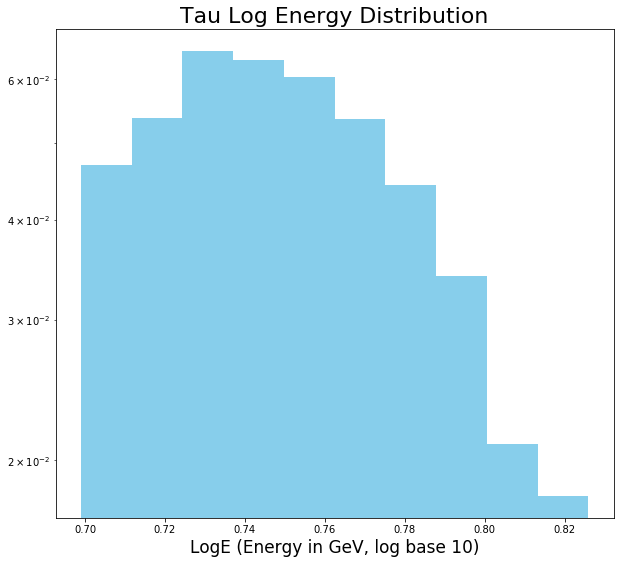

In [18]:
tau_logE = np.log10(logE)
plt.figure(figsize=(10,9))
num, bins,_ = plt.hist(tau_logE, log = True, weights=event_weight, color='skyblue')
#num1,bins1,_ = plt.hist(logE, histtype='step',log = True)
plt.title("Tau Log Energy Distribution", fontsize=22)
plt.xlabel("LogE (Energy in GeV, log base 10)", fontsize=17)